In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.lines import Line2D

data_path = "../data/scores.csv"

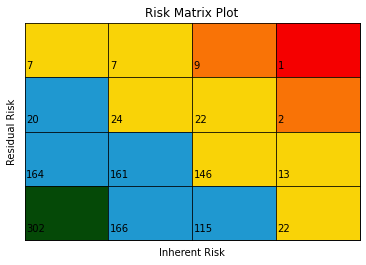

In [5]:
## plot on 

def get_count_for_matrix_plot(d_path): 

    df = pd.read_csv(d_path)

    cut_list_CR = [1, 0.75, 0.5, 0.25, 0]
    cut_list_risk = [0, 0.25, 0.5, 0.75, 1]
    l= []
    for x in range(len(cut_list_CR)-1): 
   
        sub = df[(df["Concentration Risk Normalized"] > cut_list_CR[x+1]) & (df["Concentration Risk Normalized"] < cut_list_CR[x])]
        for y in range(len(cut_list_risk)-1): 
            sub_s = sub[(sub["Final Risk Score"] < cut_list_risk[y+1]) & (sub["Final Risk Score"] > cut_list_risk[y]) ]
            l.append(len(sub_s.index))
            
    return l
        


def matrix_plot (l): 
    font_color = '#525252'
    csfont = {'fontname':'Georgia'} # title font
    hfont = {'fontname':'Calibri'} # main font
    colors = ['#650021', '#C0C0C0']

    fig = plt.figure()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('Inherent Risk')
    plt.ylabel('Residual Risk')
    plt.title('Risk Matrix Plot')

#This example is for a 5 * 5 matrix
    nrows=4
    ncols=4
    axes = [fig.add_subplot(nrows, ncols, r * ncols + c + 1) for r in range(0, nrows) for c in range(0, ncols) ]

# remove the x and y ticks

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(0,5)
        ax.set_ylim(0,5)
  

    yellow = [0, 1, 5, 6, 10, 11, 15] #yellow boxes
    orange = [2, 7] # orange boxes
    red = [3] #red boxes
    blue = [4, 8, 9, 13, 14, 15] #Green boxes
    green = [12]

    for _ in blue:
        axes[_].set_facecolor('#1F98D0')

    for _ in yellow:
        axes[_].set_facecolor('#F9D307')

    for _ in orange:
        axes[_].set_facecolor('#F97306')
    
    for _ in green:
        axes[_].set_facecolor('#054907')

    for _ in red:
        axes[_].set_facecolor('#F50000')


    for i in range(len(l)): 
        axes[i].text(0.1,0.8, l[i])
    
    fig.savefig("count_in_cell.png")
    return 



matrix_plot(get_count_for_matrix_plot(data_path))

        

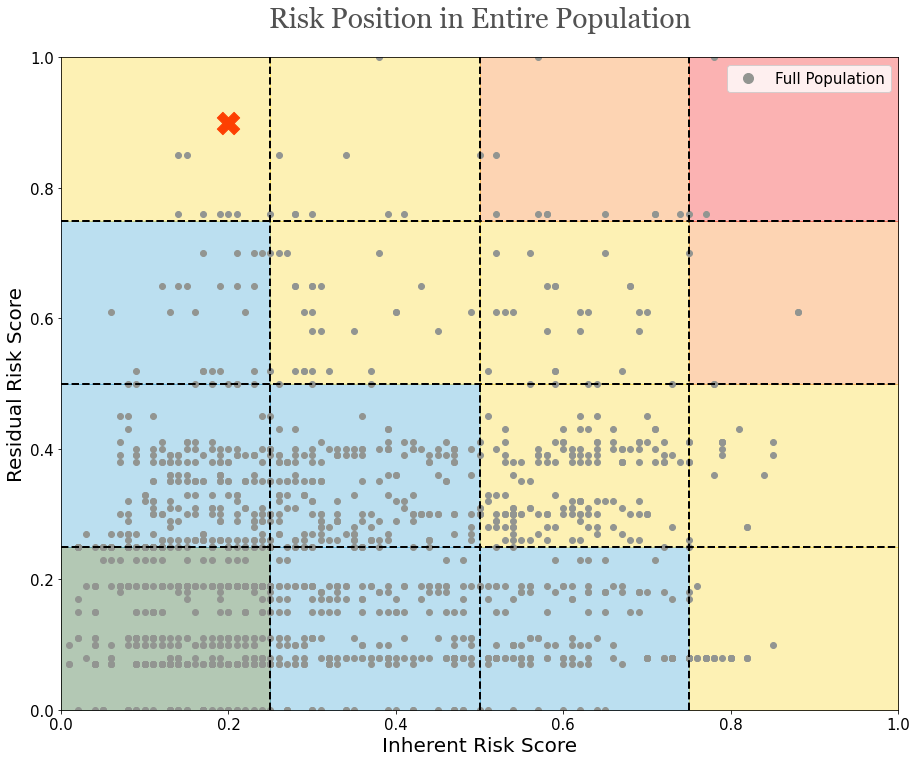

In [9]:

def plot_relative_position(starx, stary, df): 
    full_data = pd.read_csv(df)

    font_color = '#525252'
    csfont = {'fontname':'Georgia'} # title font
    hfont = {'fontname':'Calibri'} # main font
    colors = ['#650021', '#C0C0C0']

    fig,ax = plt.subplots(figsize=(15,12))
    ax.set_xlim(-0,1)
    ax.set_ylim(-0,1)

    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(15)

    plt.plot(full_data['Final Risk Score'],full_data['Concentration Risk Normalized'],"o", color='#929591')
    ax.axvline(0.25,color = 'black',linestyle='dashed',lw=2)
    ax.axhline(0.25,color = 'black',linestyle='dashed',lw=2)
    ax.axvline(0.5,color = 'black',linestyle='dashed',lw=2)
    ax.axhline(0.5,color = 'black',linestyle='dashed',lw=2)
    ax.axvline(0.75,color = 'black',linestyle='dashed',lw=2)
    ax.axhline(0.75,color = 'black',linestyle='dashed',lw=2)

    plt.scatter([concentration_risk], [final_risk], color = 'red', marker='X', s=500)

    plt.xlabel("Inherent Risk Score", fontsize=20)
    plt.ylabel("Residual Risk Score", fontsize=20)
    plt.title("Risk Position in Entire Population",pad=30, fontsize=28, color=font_color, **csfont)

    shade = 0.3
    ax.fill_between([0, 0.25],0, 0.25, alpha=shade, color='#054907')  
    ax.fill_between([0.25, 0.5],0,0.25,alpha=shade, color='#1F98D0')  
    ax.fill_between([0.5, 0.75],0,0.25,alpha=shade, color='#1F98D0')  
    ax.fill_between([0.75, 1],0,0.25,alpha=shade, color='#F9D307')  

    ax.fill_between([0, 0.25],0.25, 0.5, alpha=shade, color='#1F98D0')  
    ax.fill_between([0.25, 0.5],0.25, 0.5, alpha=shade, color='#1F98D0')  
    ax.fill_between([0.5, 0.75],0.25, 0.5, alpha=shade, color='#F9D307') 
    ax.fill_between([0.75, 1],0.25, 0.5, alpha=shade, color='#F9D307')  

    ax.fill_between([0, 0.25],0.5, 0.75, alpha=shade, color='#1F98D0')  
    ax.fill_between([0.25, 0.5],0.5, 0.75, alpha=shade, color='#F9D307')  
    ax.fill_between([0.5, 0.75],0.5, 0.75, alpha=shade, color='#F9D307')  
    ax.fill_between([0.75, 1],0.5, 0.75, alpha=shade, color='#F97306')  

    ax.fill_between([0, 0.25],0.75, 1, alpha=shade, color='#F9D307')  
    ax.fill_between([0.25, 0.5],0.75, 1, alpha=shade, color='#F9D307')  
    ax.fill_between([0.5, 0.75],0.75, 1, alpha=shade, color='#F97306')  
    ax.fill_between([0.75, 1],0.75, 1, alpha=shade, color='#F50000')  


    custom = [Line2D([], [], marker='.', markersize=20, color='#929591', linestyle='None')]
    """
    custom = [Line2D([], [], marker='.', markersize=20, color='#929591', linestyle='None'),
          Line2D([], [], marker='.', markersize=20, color='#008000', linestyle='None')]
    """
    plt.legend(custom, ['Full Population', 'Population in same service category'], loc='upper right', fontsize=15)
    ##
    plt.show()

    filename = 'risk-position'
    fig.savefig(filename+'.png')
    return 


x = 0.2
y = 0.9

plot_relative_position(x,y, data_path)